<a href="https://colab.research.google.com/github/vidhi-sys/Machine-Learning-Journey/blob/main/Underfit_overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('Ice_cream selling data.csv')
print(data.head());

   Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001
3         -3.949661                37.539845
4         -3.578554                32.284531


In [6]:
from sklearn.model_selection import train_test_split
x=data['Temperature (°C)']
y=data['Ice Cream Sales (units)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train.values.reshape(-1, 1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


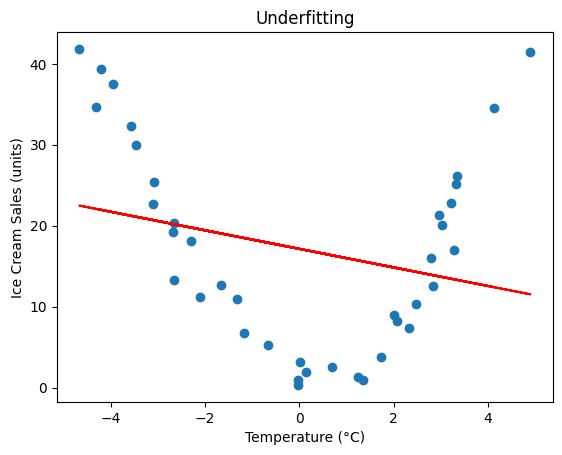

In [8]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train.values.reshape(-1, 1)), color='red')
plt.title('Underfitting')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [9]:
!pip install scikit-learn --upgrade

To apply logistic regression, we first need to import the necessary modules, create a logistic regression model, train it, and then we can visualize the results.

**Note:** Logistic regression is a classification algorithm, and this dataset appears to be for regression (predicting continuous ice cream sales). Applying logistic regression might not be the most appropriate approach for this specific dataset unless the problem is reframed as a classification task (e.g., predicting if sales are above a certain threshold). However, I will proceed with the request to demonstrate the code for logistic regression.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Logistic Regression model
# For demonstration purposes with this regression dataset, we'll create a binary target
# by classifying sales as 'High' or 'Low' based on the median sales value.
median_sales = y_train.median()
y_train_binary = (y_train > median_sales).astype(int)
y_test_binary = (y_test > median_sales).astype(int)

model_logistic = LogisticRegression()

# Train the model
model_logistic.fit(x_train.values.reshape(-1, 1), y_train_binary)

# Predict on the test set
y_pred_binary = model_logistic.predict(x_test.values.reshape(-1, 1))

# Evaluate the model (optional but recommended for classification)
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_binary))

Accuracy: 0.5
Confusion Matrix:
 [[5 2]
 [3 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.00      0.00      0.00         3

    accuracy                           0.50        10
   macro avg       0.31      0.36      0.33        10
weighted avg       0.44      0.50      0.47        10



Now, let's plot the results of the logistic regression. We can visualize the probability of the positive class (High sales) as a function of temperature and the decision boundary.

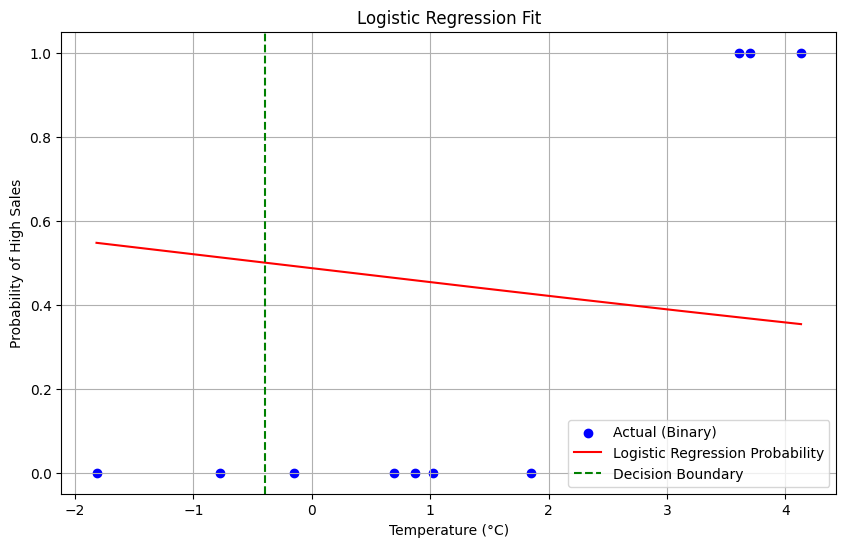

In [12]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test_binary, color='blue', label='Actual (Binary)')

# Plot the logistic regression curve
x_plot = np.linspace(x_test.min(), x_test.max(), 300).reshape(-1, 1)
y_plot_prob = model_logistic.predict_proba(x_plot)[:, 1] # Probability of the positive class

plt.plot(x_plot, y_plot_prob, color='red', label='Logistic Regression Probability')

# Plot the decision boundary (where probability is 0.5)
decision_boundary = -model_logistic.intercept_[0] / model_logistic.coef_[0][0]
plt.axvline(decision_boundary, color='green', linestyle='--', label='Decision Boundary')

plt.title('Normal Fit')
plt.xlabel('Temperature (°C)')
plt.ylabel('Probability of High Sales')
plt.legend()
plt.grid(True)
plt.show()

To apply polynomial regression, we need to transform the input feature (Temperature) into polynomial features. Then, we can fit a linear regression model to these new features.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features. You can change the degree of the polynomial by modifying the 'degree' parameter.
degree = 2  # For a quadratic fit
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train.values.reshape(-1, 1))
x_test_poly = poly_features.transform(x_test.values.reshape(-1, 1))

# Create a Linear Regression model and train it with the polynomial features
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)

# Predict on the test set
y_pred_poly = model_poly.predict(x_test_poly)

Now, let's visualize the polynomial regression fit. We will plot the original data and the predicted curve from the polynomial model.

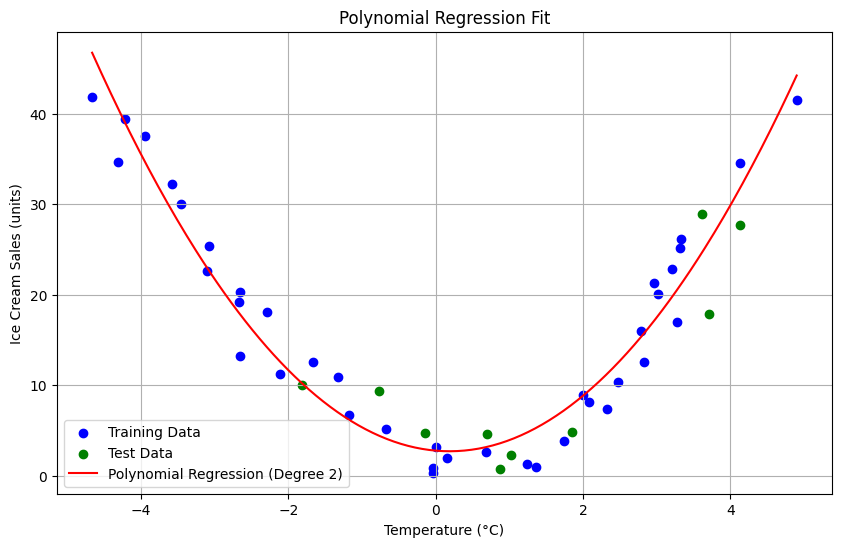

In [14]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')

# Plot the polynomial regression curve
# To plot the curve smoothly, we will create a range of temperature values and predict the sales
x_plot = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_plot_poly = poly_features.transform(x_plot)
y_plot_poly = model_poly.predict(x_plot_poly)

plt.plot(x_plot, y_plot_poly, color='red', label=f'Polynomial Regression (Degree {degree})')

plt.title('OverFitting')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.grid(True)
plt.show()